# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Generate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Guide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Guide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/GuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?

Regex are 

> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.

\d{4}



In [8]:
import networkx as nx
import re
import requests

# Fetching the test-text from the URL
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt"
test_text = requests.get(url).text

# Define our regex pattern
pattern = re.compile(r'\b\d{4}\b')

# Use findall to get all matches in the test-text
matches = pattern.findall(test_text)

# Print all matches
print(matches)

['1234', '9999']


> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

In [2]:
# Fetching the test-text from the URL
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt"
test_text = requests.get(url).text

# Define our regex pattern
pattern = re.compile(r'\bsuper\w*', re.IGNORECASE)  # re.IGNORECASE makes the match case insensitive

# Use findall to get all matches in the test-text
matches = pattern.findall(test_text)

# Print all matches
print(matches)

['superpolaroid', 'supertaxidermy', 'superbeer']


Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [3]:
# Fetching the test-text from the URL
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt"
test_text = requests.get(url).text

# Define the regex pattern
pattern = re.compile(r'\[\[(.*?)(\|.*?)?\]\]')

# Use findall to get all matches in the test-text
matches = pattern.findall(test_text)

# Print all matches
for match in matches:
    print(match[0] if not match[1] else match[0] + match[1])

# If you want only the link part, you can just print match[0]


drinking vinegar
gentrify
hashtag
Bicycle|Bicycle(two-wheeled type)
Pitchfork|Pitchfork Magazine


# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [4]:
import json
import pandas as pd
import urllib.request

# URLs of the CSV files
west_coast_url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2023/main/files/WestCoastRappers.csv'
east_coast_url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2023/main/files/EastCoastRappers.csv'

# Reading the CSV files into pandas DataFrames
west_coast_df = pd.read_csv(west_coast_url)
east_coast_df = pd.read_csv(east_coast_url)

west_coast_df

,Unnamed: 0,WikipediaPageName
0,0,03 Greedo
1,1,24kGoldn
2,2,40 Glocc
3,3,A-Plus (rapper)
4,4,DJ A-Tron
...,...,...
349,349,Young L
350,350,Yukmouth
351,351,Arif Zahir
352,352,Zealous1


In [9]:
# Wikipedia API base URL
wiki_api_base = "https://en.wikipedia.org/w/api.php"
# Extract Outgoing Links Using Regular Expression
link_re = re.compile(r'\[\[(.*?)(\|.*?)*\]\]')
# Extracting words using Regular Expression
word_re = re.compile(r"\w+")

def get_wiki_content(page_title):
    page_title_encoded = urllib.parse.quote(page_title)
    query = f"{wiki_api_base}?action=query&prop=revisions&rvprop=content&format=json&titles={page_title_encoded}"
    
    with urllib.request.urlopen(query) as url:
        data = json.loads(url.read().decode())
        page = next(iter(data['query']['pages'].values()))
        return page['revisions'][0]['*'] if 'revisions' in page else ''
    
def process_page(rapper_name, page_content):
    links = link_re.findall(page_content)
    for link in links:
        linked_rapper = link[0].replace(' ', '_')
        if linked_rapper in all_rappers:
            rapper_network.add_edge(rapper_name, linked_rapper)

rapper_network = nx.DiGraph()
all_rappers = []

In [10]:
for _, row in west_coast_df.iterrows():
    rapper_name = row['WikipediaPageName']
    all_rappers.append(rapper_name)
    rapper_network.add_node(rapper_name, coast='West')

for _, row in east_coast_df.iterrows():
    rapper_name = row['WikipediaPageName']
    all_rappers.append(rapper_name)
    rapper_network.add_node(rapper_name, coast='East')

all_rapper_pages = {}
for rapper_name in all_rappers:
    print(f"Fetching content for {rapper_name}...")
    page_content = get_wiki_content(rapper_name.replace(' ', '_'))
    all_rapper_pages[rapper_name] = page_content
    process_page(rapper_name, page_content)

isolated_nodes = [node for node, degree in rapper_network.degree() if degree == 0]
rapper_network.remove_nodes_from(isolated_nodes)

Fetching content for 03 Greedo...
Fetching content for 24kGoldn...
Fetching content for 40 Glocc...
Fetching content for A-Plus (rapper)...
Fetching content for DJ A-Tron...
Fetching content for Ab-Soul...
Fetching content for Abstract Rude...
Fetching content for Aceyalone...
Fetching content for Afroman...
Fetching content for Ahmad (rapper)...
Fetching content for Ak'Sent...
Fetching content for The Alchemist (musician)...
Fetching content for AMG (rapper)...
Fetching content for Aminé (rapper)...
Fetching content for Antwon...
Fetching content for Aztlan Underground...
Fetching content for B-Legit...
Fetching content for B-Real...
Fetching content for B.G. Knocc Out...
Fetching content for Show Banga...
Fetching content for Ant Banks...
Fetching content for Sho Baraka...
Fetching content for Bavgate...
Fetching content for Becky G...
Fetching content for Beeda Weeda...
Fetching content for Beefy (rapper)...
Fetching content for Berner (rapper)...
Fetching content for Big B (rapper)

In [12]:
# Save rapper_network to a pickle file

import pickle

with open('rapper_network.pkl', 'wb') as fp:
    pickle.dump(rapper_network, fp)

In [21]:
# Printing the network
print(rapper_network.nodes(data=True))
print(rapper_network.edges())

[('24kGoldn', {'coast': 'West'}), ('40 Glocc', {'coast': 'West'}), ('DJ A-Tron', {'coast': 'West'}), ('Ab-Soul', {'coast': 'West'}), ('Abstract Rude', {'coast': 'West'}), ('Aceyalone', {'coast': 'West'}), ('Afroman', {'coast': 'West'}), ("Ak'Sent", {'coast': 'West'}), ('The Alchemist (musician)', {'coast': 'West'}), ('B-Legit', {'coast': 'West'}), ('B-Real', {'coast': 'West'}), ('B.G. Knocc Out', {'coast': 'West'}), ('Show Banga', {'coast': 'West'}), ('Ant Banks', {'coast': 'West'}), ('Sho Baraka', {'coast': 'West'}), ('Becky G', {'coast': 'West'}), ('Berner (rapper)', {'coast': 'West'}), ('Big B (rapper)', {'coast': 'West'}), ('Big Dave (rapper)', {'coast': 'West'}), ('Bizzle', {'coast': 'West'}), ('Aloe Blacc', {'coast': 'West'}), ('Blueface', {'coast': 'West'}), ('Blxst', {'coast': 'West'}), ('Buddy (rapper)', {'coast': 'West'}), ('Busdriver', {'coast': 'West'}), ('Sway Calloway', {'coast': 'West'}), ('Clyde Carson', {'coast': 'West'}), ('Celestaphone', {'coast': 'West'}), ('Tha Chi

In [30]:
print(rapper_network.number_of_nodes())
print(rapper_network.number_of_edges())

539
1296


In [31]:
west_east_links = sum(1 for u, v in rapper_network.edges() if rapper_network.nodes[u]['coast'] != rapper_network.nodes[v]['coast'])
print(f"Number of links between West Coast and East Coast: {west_east_links}")


Number of links between West Coast and East Coast: 269


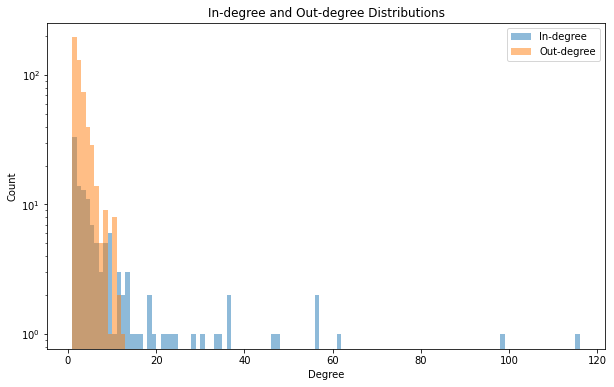

In [29]:
# Plot the In-degree and Out-degree Distributions
import matplotlib.pyplot as plt

# Get in-degrees and out-degrees
in_degrees = [deg for node, deg in rapper_network.in_degree()]
out_degrees = [deg for node, deg in rapper_network.out_degree()]

# Plot in-degree distribution
plt.figure(figsize=(10,6))
plt.hist(in_degrees, bins=range(1, max(in_degrees) + 2), alpha=0.5, label='In-degree')
# Plot out-degree distribution
plt.hist(out_degrees, bins=range(1, max(out_degrees) + 2), alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.yscale('log')
plt.title('In-degree and Out-degree Distributions')
plt.legend()
plt.show()

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0


> 
> _Exercise_: Build the network of rappers 

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.



> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * What is the number of links connecting West coast and East coast? What do those links mean?


In [35]:
# Sort nodes by in-degree
sorted_by_indegree = sorted(rapper_network.in_degree(), key=lambda x: x[1], reverse=True)
# Sort nodes by out-degree
sorted_by_outdegree = sorted(rapper_network.out_degree(), key=lambda x: x[1], reverse=True)

# Print top 10 rappers by in-degree
print("Top 10 by In-degree:")
for n, d in sorted_by_indegree[:10]:
    print(n, d)

# Print top 10 rappers by out-degree
print("\nTop 10 by Out-degree:")
for n, d in sorted_by_outdegree[:10]:
    print(n, d)

Top 10 by In-degree:
Jay-Z 115
Nas 98
E-40 61
Jadakiss 56
KRS-One 56
Kurupt 47
Fabolous 46
Cam'ron 36
RZA 36
Ice-T 34

Top 10 by Out-degree:
DJ Dahi 12
Dr. Dre 11
Kendrick Lamar 11
Kam (rapper) 10
Ras Kass 10
RBX 10
50 Cent 10
DJ Kay Slay 10
Kool G Rap 10
Uncle Murda 10


> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

In [37]:
# Filter and sort West Coast rappers by in-degree
west_coast_indegree = [(n, d) for n, d in sorted_by_indegree if rapper_network.nodes[n]['coast'] == 'West'][:5]

# Filter and sort West Coast rappers by out-degree
west_coast_outdegree = [(n, d) for n, d in sorted_by_outdegree if rapper_network.nodes[n]['coast'] == 'West'][:5]

# Filter and sort East Coast rappers by in-degree
east_coast_indegree = [(n, d) for n, d in sorted_by_indegree if rapper_network.nodes[n]['coast'] == 'East'][:5]

# Filter and sort East Coast rappers by out-degree
east_coast_outdegree = [(n, d) for n, d in sorted_by_outdegree if rapper_network.nodes[n]['coast'] == 'East'][:5]

print("Top 5 West Coast by In-degree:", west_coast_indegree)
print("Top 5 West Coast by Out-degree:", west_coast_outdegree)
print("Top 5 East Coast by In-degree:", east_coast_indegree)
print("Top 5 East Coast by Out-degree:", east_coast_outdegree)

Top 5 West Coast by In-degree: [('E-40', 61), ('Kurupt', 47), ('Ice-T', 34), ('Xzibit', 30), ('Ab-Soul', 24)]
Top 5 West Coast by Out-degree: [('DJ Dahi', 12), ('Dr. Dre', 11), ('Kendrick Lamar', 11), ('Kam (rapper)', 10), ('Ras Kass', 10)]
Top 5 East Coast by In-degree: [('Jay-Z', 115), ('Nas', 98), ('Jadakiss', 56), ('KRS-One', 56), ('Fabolous', 46)]
Top 5 East Coast by Out-degree: [('50 Cent', 10), ('DJ Kay Slay', 10), ('Kool G Rap', 10), ('Uncle Murda', 10), ('Nas', 10)]


> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)
